In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Load Cleaned Datasets

In [2]:
df1_filtered = pd.read_csv("asserts/df1_filtered.csv")
df1_filtered.head()

,State,County,City,Make,Model,ModelYear,EVType,ElectricRange,BasePrice
0,WA,King,Seattle,BMW,X5,2023,PHEV,30,0
1,WA,Yakima,Moxee,FORD,ESCAPE,2022,PHEV,38,0
2,WA,King,Seattle,CHEVROLET,BOLT EV,2018,BEV,238,0
3,WA,King,Newcastle,TESLA,MODEL S,2013,BEV,208,69900
4,WA,Kitsap,Bremerton,FORD,C-MAX,2015,PHEV,19,0


In [3]:
df2_filtered = pd.read_csv("asserts/df2_filtered.csv")
df2_filtered.head()

,Date,State,County,BEVCount,PHEVCount,EVTotal,NonEVTotal
0,2021-04-30,WA,Thurston,0,0,0,56710
1,2017-10-31,WA,Adams,3,3,6,12283
2,2018-07-31,WA,Whatcom,2,0,2,42313
3,2019-08-31,WA,Grays Harbor,0,0,0,20570
4,2019-10-31,WA,Cowlitz,0,0,0,29023


In [4]:
# Filter the datasets for each state
df1_wa = df1_filtered[df1_filtered['State'] == 'WA']
df1_ca = df1_filtered[df1_filtered['State'] == 'CA']

df2_wa = df2_filtered[df2_filtered['State'] == 'WA']
df2_ca = df2_filtered[df2_filtered['State'] == 'CA']



## Analysis and Visualizations

Which 5 counties, among all counties in WA/CA State, have experienced the most significant cumulative growth in electric vehicle (EV) adoption over time, and how do their annual growth rates and absolute EV counts compare to those of all other counties in the state?

In [5]:


def analyze_county_ev_adoption(df_state, state_name):
    
    df_state['Year'] = pd.to_datetime(df_state['Date']).dt.year
    annual_ev_total = df_state.groupby(['County', 'Year'])['EVTotal'].sum().reset_index()
    annual_ev_total['GrowthRate'] = annual_ev_total.groupby('County')['EVTotal'].pct_change() * 100
    
    # Calculate cumulative growth rate for each county
    cumulative_growth = annual_ev_total.groupby('County')['GrowthRate'].prod().reset_index()
    cumulative_growth.columns = ['County', 'CumulativeGrowthRate']
    top_5_growth_counties = cumulative_growth.sort_values(by='CumulativeGrowthRate', ascending=False).head(5)
    

    
    # Filter annual EV total to include only top 5 growth counties
    annual_ev_total_top_5 = annual_ev_total[annual_ev_total['County'].isin(top_5_growth_counties['County'])]
    
    # Create four subplots
    fig, axs = plt.subplots(2, 2, figsize=(16, 12))
    
    # growth rate for all countries
    sns.lineplot(data=annual_ev_total, x='Year', y='GrowthRate',
                 hue='County', marker='o', ax=axs[0, 0], palette='tab10')
    axs[0, 0].set_title(f'Annual Growth Rate of EV Adoption for All Counties in {state_name}')
    axs[0, 0].set_ylabel('Growth Rate (%)')
    axs[0, 0].get_legend().remove()  
    
    # growth rate for top 5 counties
    sns.lineplot(data=annual_ev_total_top_5, x='Year', y='GrowthRate',
                 hue='County', marker='o', ax=axs[0, 1], palette='tab10')
    axs[0, 1].set_title(f'Annual Growth Rate of EV Adoption for Top 5 Growth Counties in {state_name}')
    axs[0, 1].set_ylabel('Growth Rate (%)')
    
    # absolute ev counts for all counties
    sns.lineplot(data=annual_ev_total, x='Year', y='EVTotal', 
                 hue='County', marker='o', ax=axs[1, 0], palette='tab20b')
    axs[1, 0].set_title(f'Absolute EV Counts of EV Adoption for All Counties in {state_name}')
    axs[1, 0].set_ylabel('EV Total Count')
    axs[1, 0].get_legend().remove()  
    
    # absolute ev counts for top 5 counties
    sns.lineplot(data=annual_ev_total_top_5, x='Year', y='EVTotal', 
                 hue='County', marker='o', ax=axs[1, 1], palette='tab20b')
    axs[1, 1].set_title(f'Absolute EV Counts of EV Adoption for Top 5 Growth Counties in {state_name}')
    axs[1, 1].set_ylabel('EV Total Count')
    
    # legend
    handles, labels = axs[0, 1].get_legend_handles_labels()
    axs[0, 1].legend(handles=handles[1:], labels=labels[1:])
    handles, labels = axs[1, 1].get_legend_handles_labels()
    axs[1, 1].legend(handles=handles[1:], labels=labels[1:])
    plt.tight_layout()
    plt.show()
    
    return top_5_growth_counties


C:\Users\qfu88\AppData\Local\Temp\ipykernel_25792\1484763927.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_state['Year'] = pd.to_datetime(df_state['Date']).dt.year


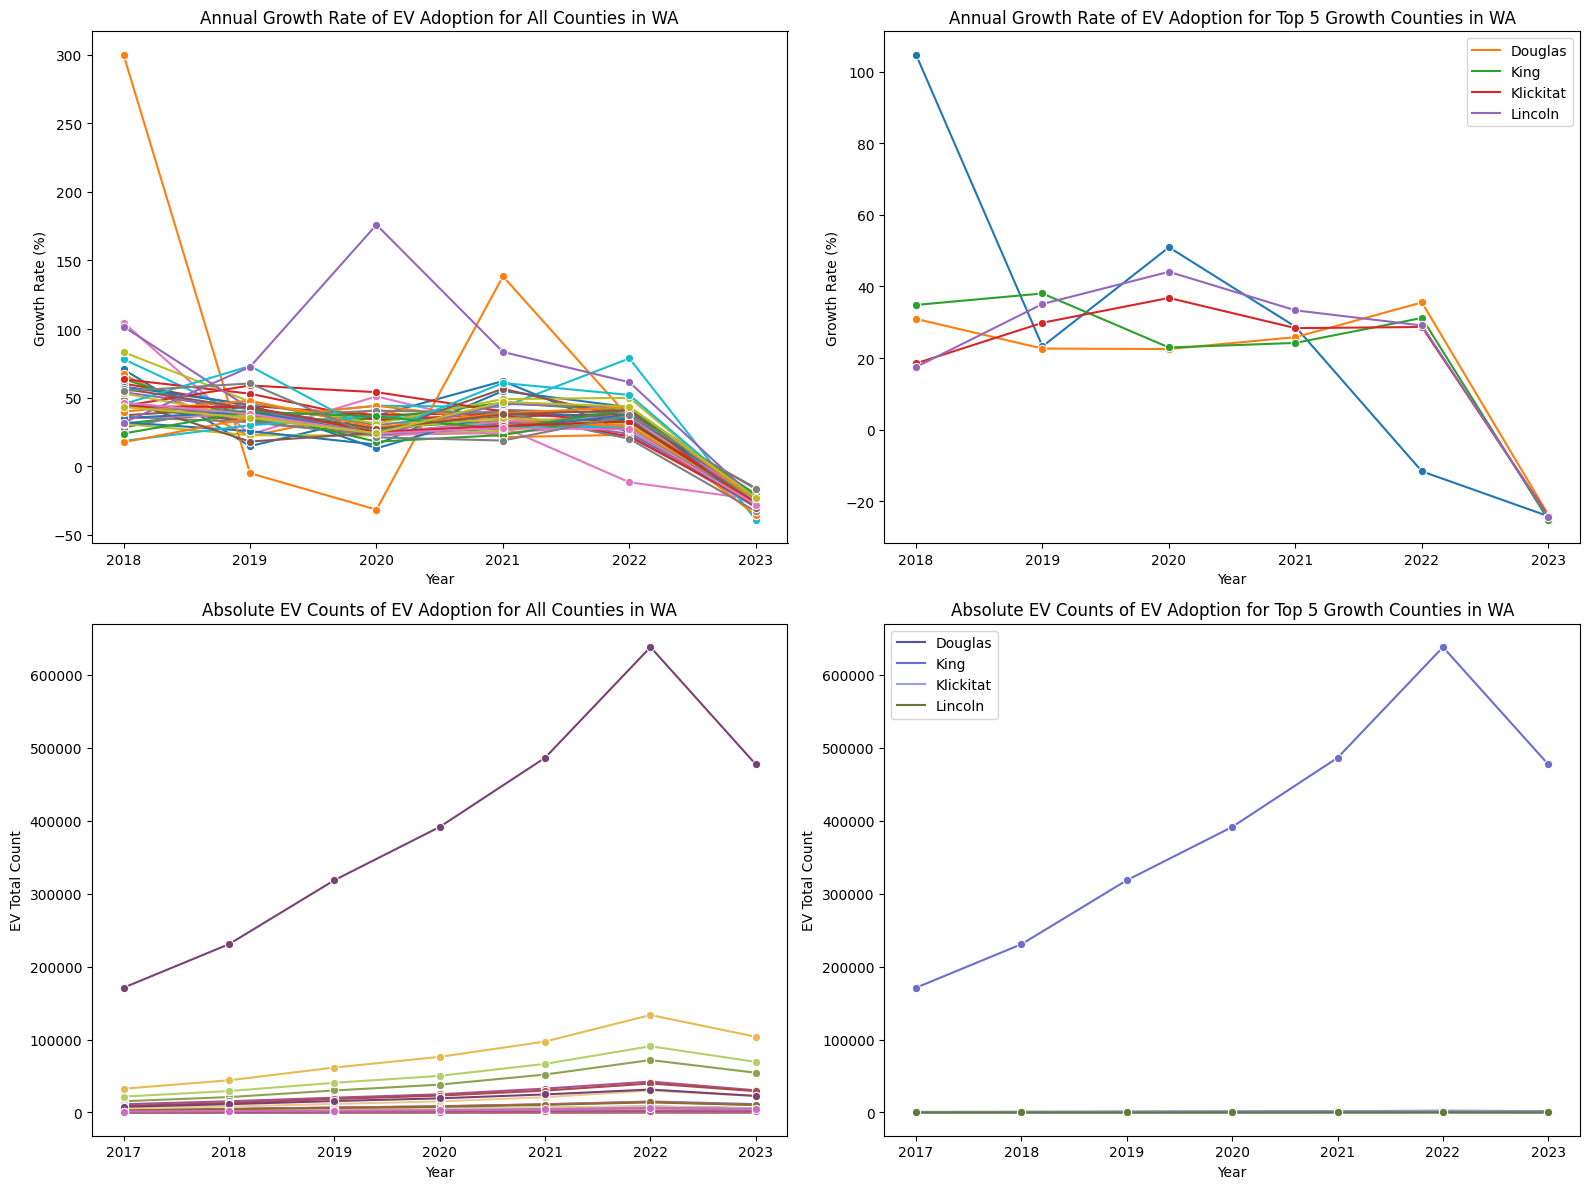

WA        County  CumulativeGrowthRate
6    Columbia          1.005046e+09
8     Douglas         -3.451894e+08
19  Klickitat         -3.997471e+08
16       King         -5.799180e+08
21    Lincoln         -6.422970e+08


In [6]:
# WA
top_5_growth_counties_wa = analyze_county_ev_adoption(df2_wa, 'WA')
print("WA", top_5_growth_counties_wa)


C:\Users\qfu88\AppData\Local\Temp\ipykernel_25792\1484763927.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_state['Year'] = pd.to_datetime(df_state['Date']).dt.year
C:\Users\qfu88\anaconda3\envs\dojo-env\lib\site-packages\seaborn\relational.py:414: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  cis = grouped.apply(bootstrapped_cis)


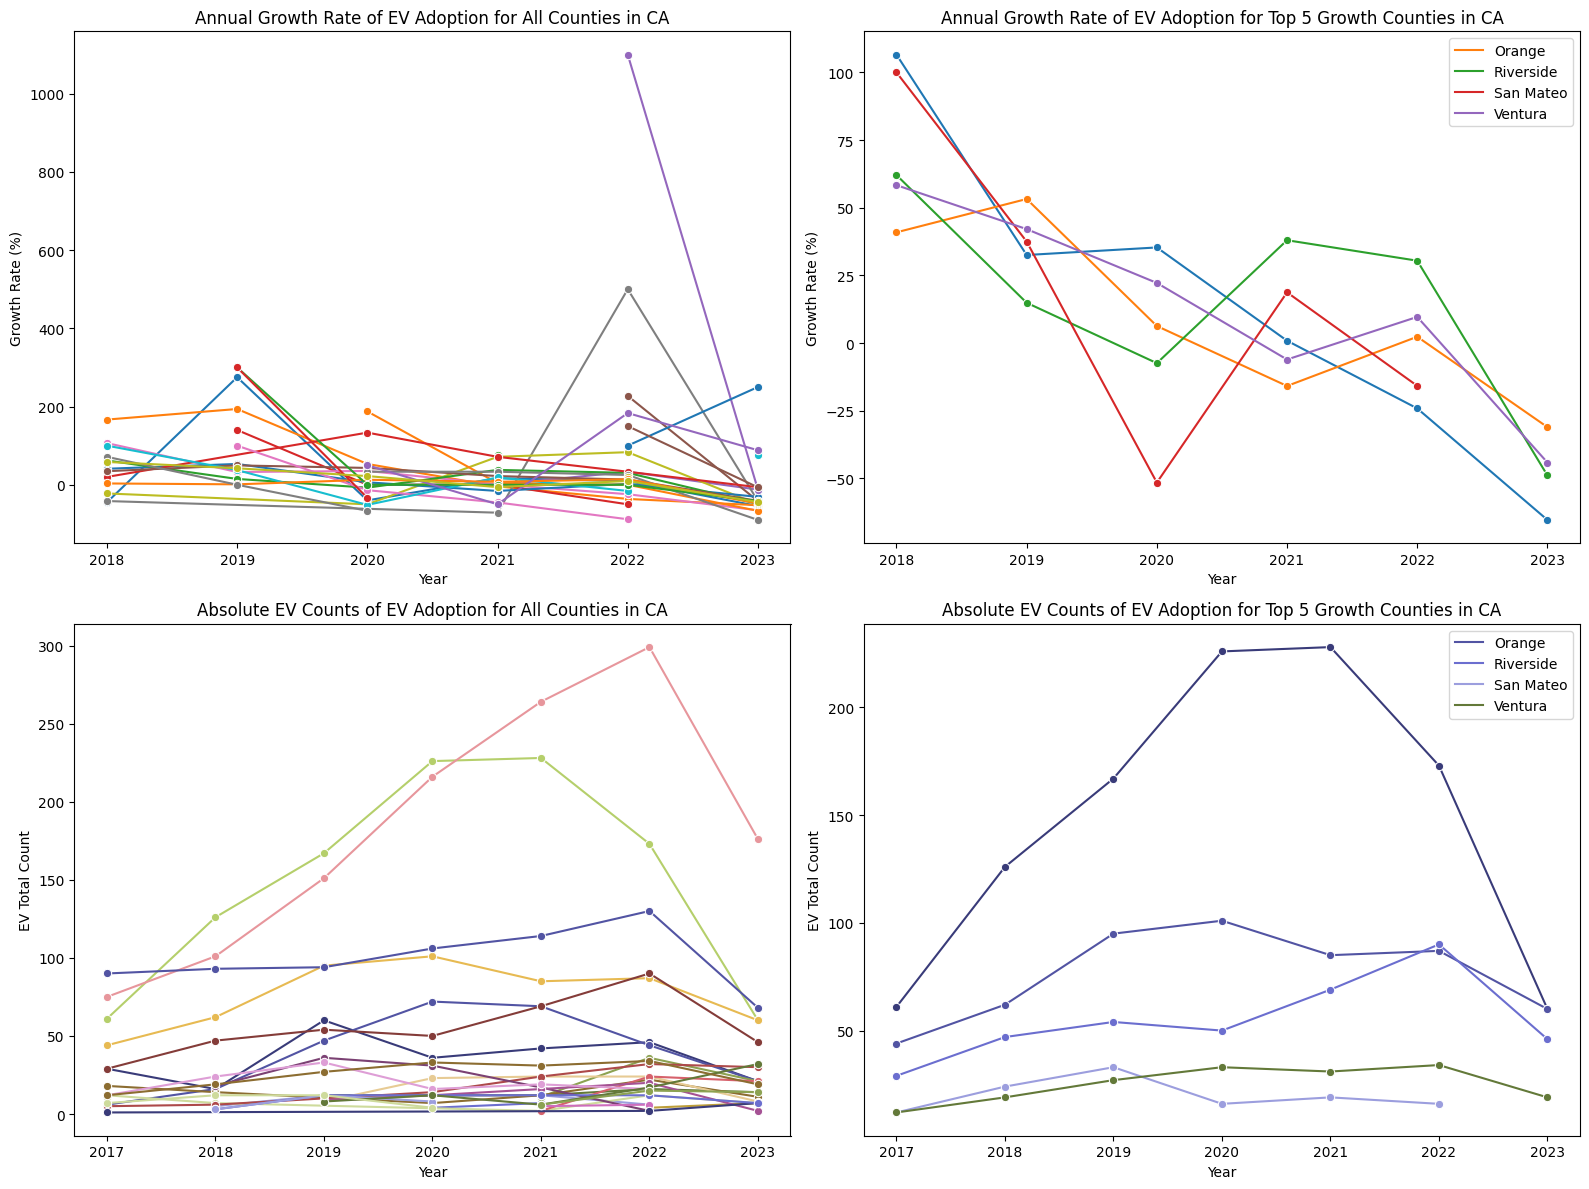

CA          County  CumulativeGrowthRate
12    Riverside          3.871728e+08
6   Los Angeles          1.708103e+08
28      Ventura          1.412305e+08
19    San Mateo          5.719199e+07
10       Orange          1.590831e+07


In [7]:
# CA

top_5_growth_counties_ca = analyze_county_ev_adoption(df2_ca, 'CA')
print("CA", top_5_growth_counties_ca)

### Analysis

## write my analysis here

How have the yearly adoption trends and preferences for BEV and PHEV, EV and NonEV compared to each other within the top 5 counties?

In [8]:
top_counties_WA = ['Columbia', 'Douglas', 'Klickitat', 'King', 'Lincoln']
top_counties_CA = ['Riverside', 'Los Angeles', 'Ventura', 'San Mateo', 'Orange']

In [9]:
def analyze_ev_counts(df, state_name, top_counties):
    # Filter top 5 for each state
    top_counties_df = df[(df['State'] == state_name) & (df['County'].isin(top_counties))]
    
    # Extract year and group by year and county
    top_counties_df['Year'] = pd.to_datetime(top_counties_df['Date']).dt.year
    grouped_df = top_counties_df.groupby(['County', 'Year'])[['BEVCount', 'PHEVCount', 'EVTotal', 'NonEVTotal']].sum().reset_index()
    
    # Melting the df
    bev_phev_df = grouped_df.melt(id_vars=['County', 'Year'], value_vars=['BEVCount', 'PHEVCount'])
    ev_nonev_df = grouped_df.melt(id_vars=['County', 'Year'], value_vars=['EVTotal', 'NonEVTotal'])
    
    for county in top_counties:
        
        sns.set_style("whitegrid")
        palette = "viridis"
        
        fig, axs = plt.subplots(2, 1, figsize=(8, 8)) 
        
        # Plotting BEV and PHEV
        sns.barplot(x='Year', y='value', hue='variable', 
                    data=bev_phev_df[bev_phev_df['County'] == county], ax=axs[0], palette=palette)
        axs[0].set_title(f'{county} County in {state_name} - BEV and PHEV Counts Over Years', 
                         fontsize=16, fontweight='bold')
        axs[0].set_ylabel('Count', fontsize=12)
        axs[0].set_xlabel('Year', fontsize=12)
        axs[0].legend(loc='upper right', frameon=True, title="Vehicle Type", title_fontsize='13', fontsize='11')
        axs[0].grid(True, linestyle='--', alpha=0.7)
        axs[0].tick_params(axis='x', rotation=45)
        
        # Plotting EVTotal and NonEVTotal 
        sns.barplot(x='Year', y='value', hue='variable', 
                    data=ev_nonev_df[ev_nonev_df['County'] == county], ax=axs[1], palette=palette)
        axs[1].set_title(f'{county} County in {state_name} - EVTotal and NonEVTotal Counts Over Years', 
                         fontsize=16, fontweight='bold')
        axs[1].set_ylabel('Count', fontsize=12)
        axs[1].set_xlabel('Year', fontsize=12)
        axs[1].legend(loc='upper right', frameon=True, title="Count Type", title_fontsize='13', fontsize='11')
        axs[1].grid(True, linestyle='--', alpha=0.7)
        axs[1].tick_params(axis='x', rotation=45)
        
        plt.tight_layout(pad=3.0)
        plt.show()



C:\Users\qfu88\AppData\Local\Temp\ipykernel_25792\879076716.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_counties_df['Year'] = pd.to_datetime(top_counties_df['Date']).dt.year


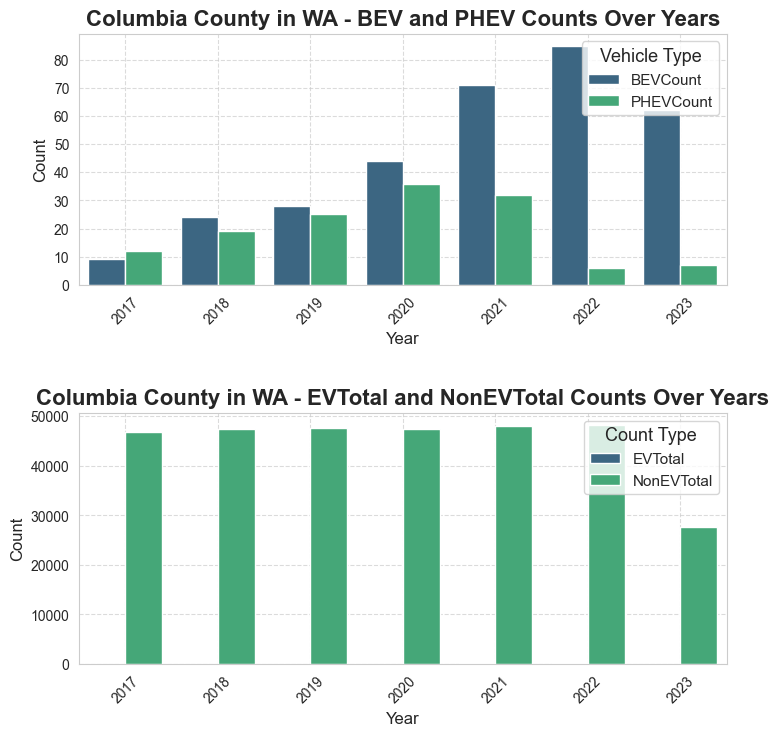

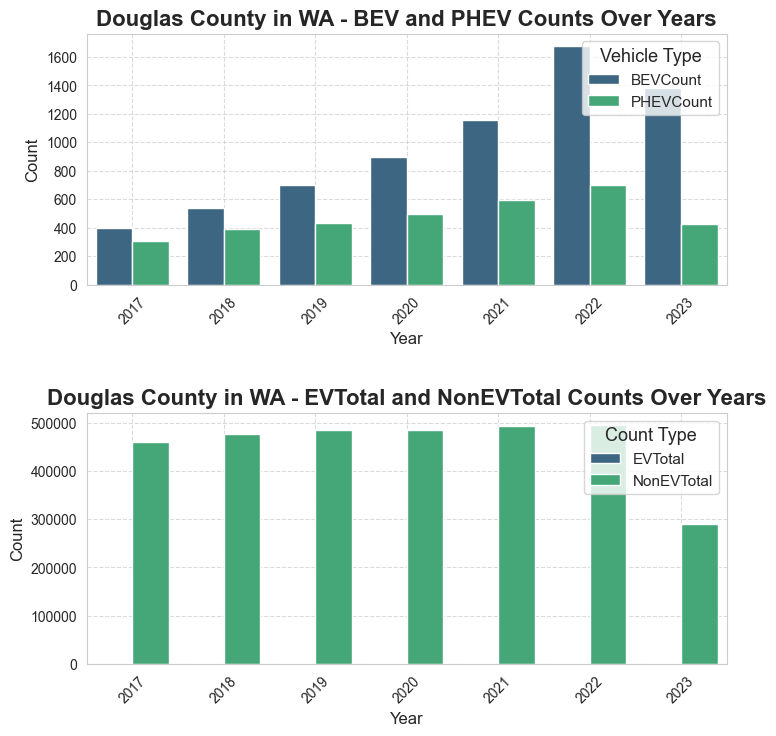

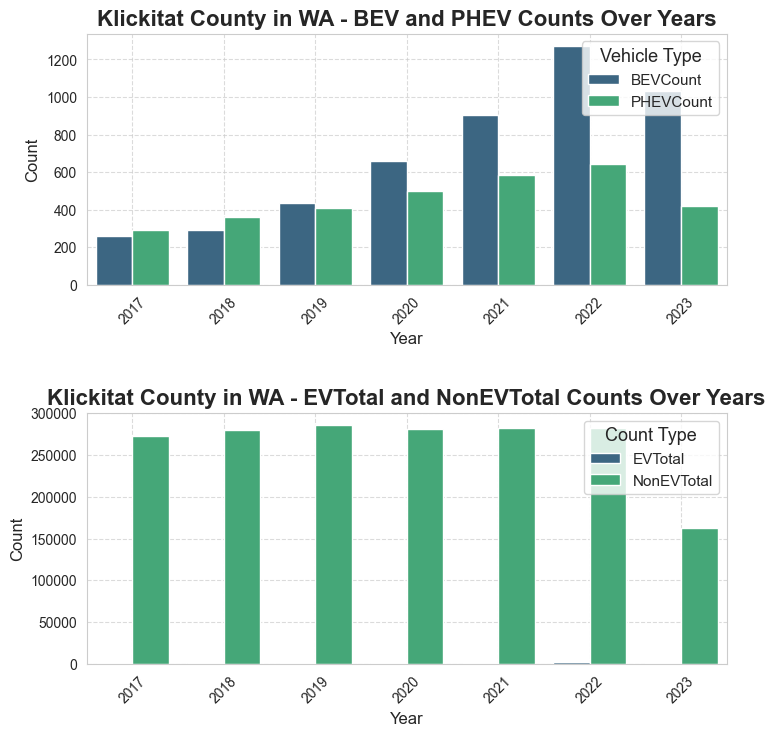

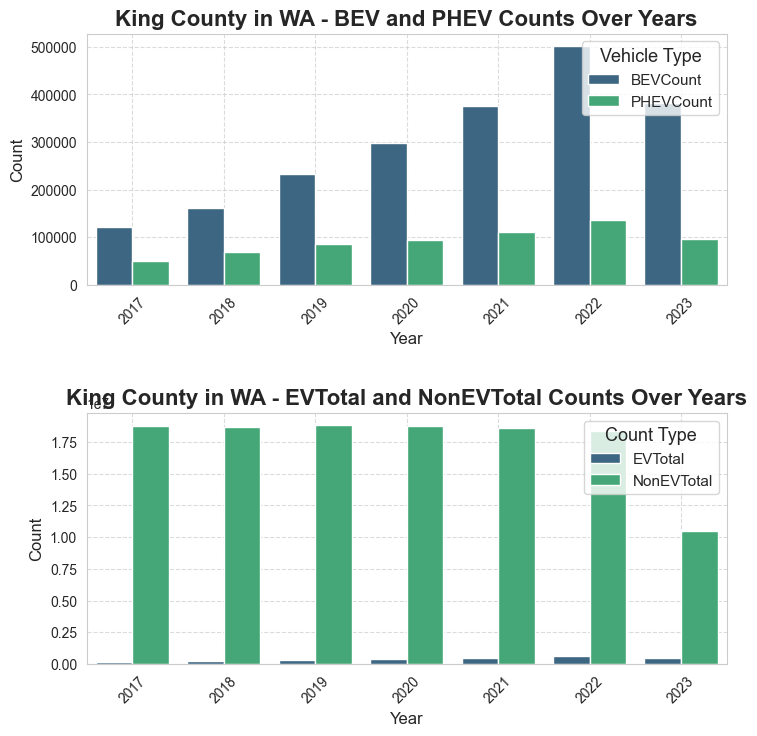

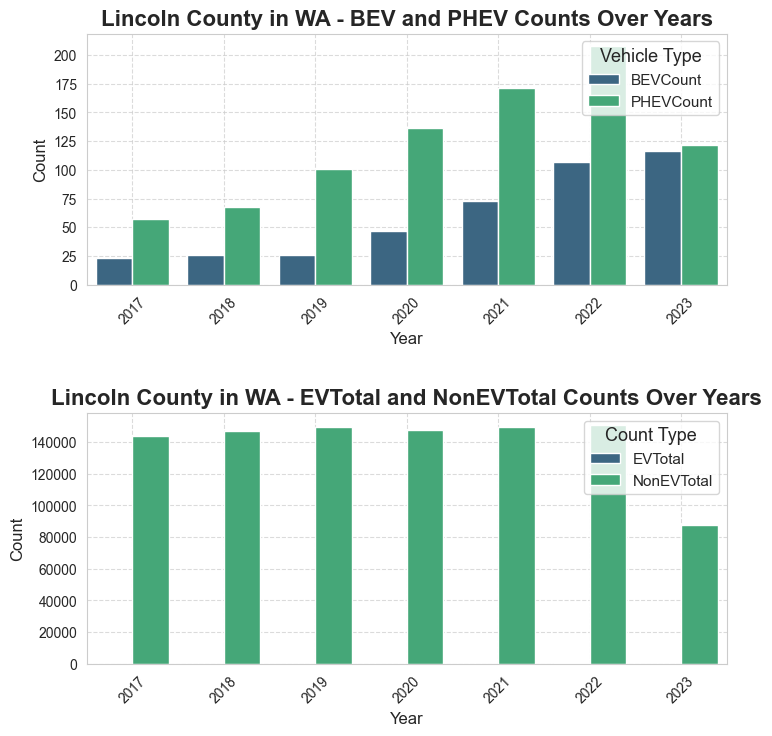

In [10]:
analyze_ev_counts(df2_filtered, 'WA', top_counties_WA)

C:\Users\qfu88\AppData\Local\Temp\ipykernel_25792\879076716.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_counties_df['Year'] = pd.to_datetime(top_counties_df['Date']).dt.year


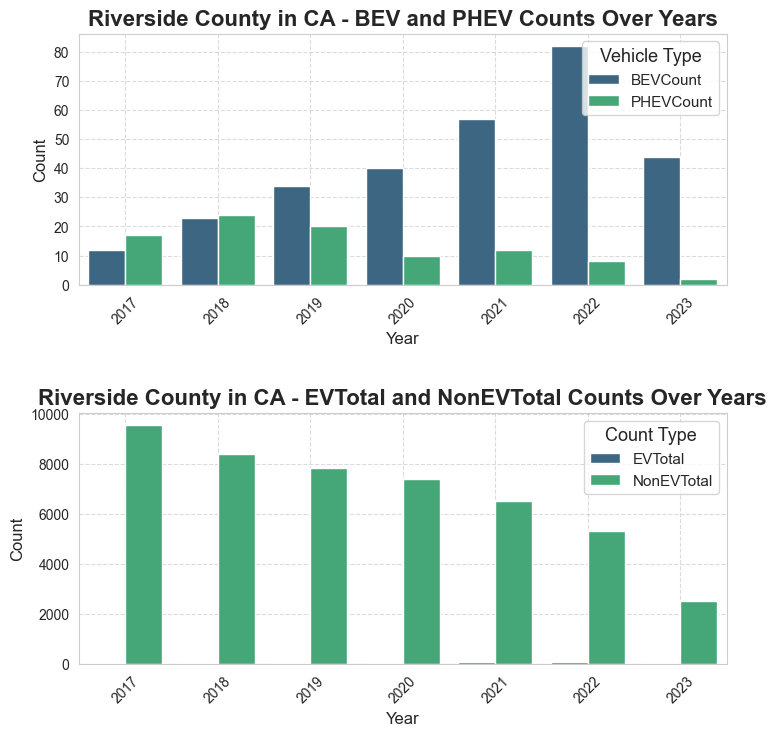

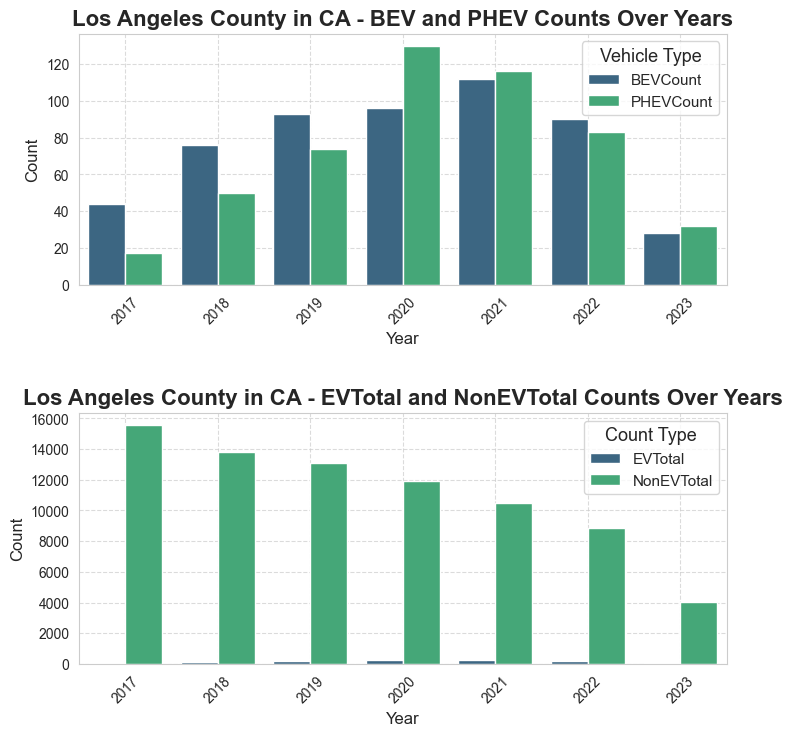

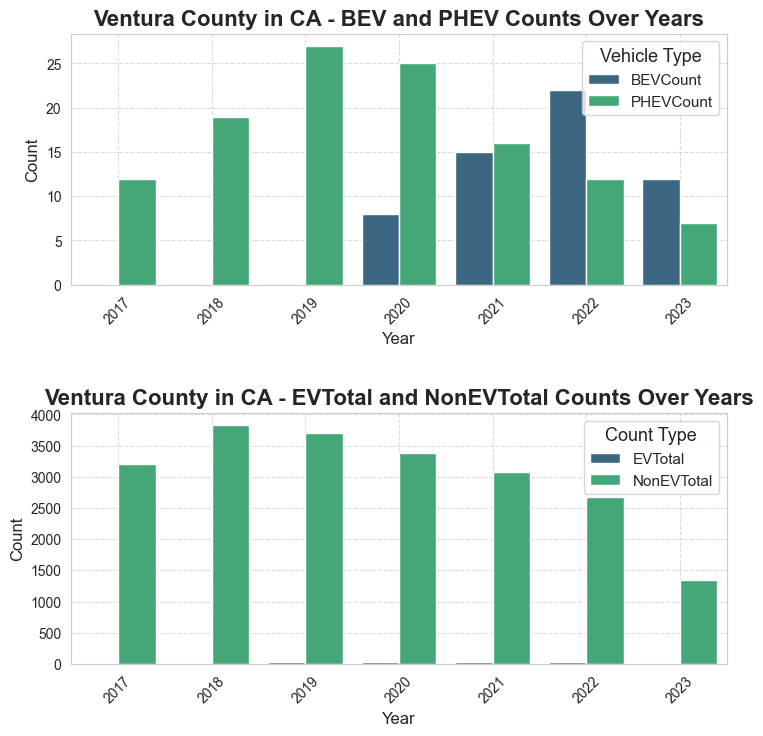

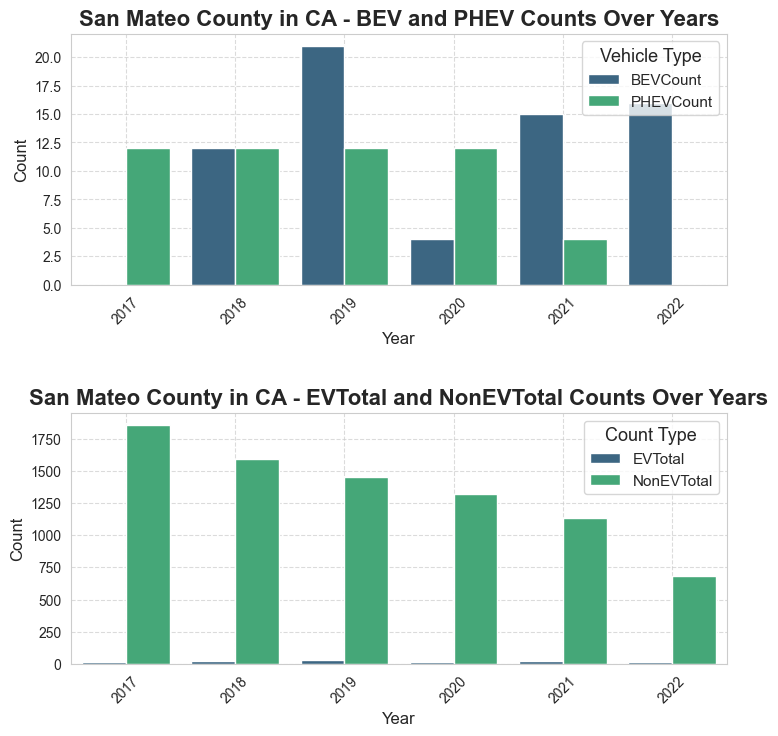

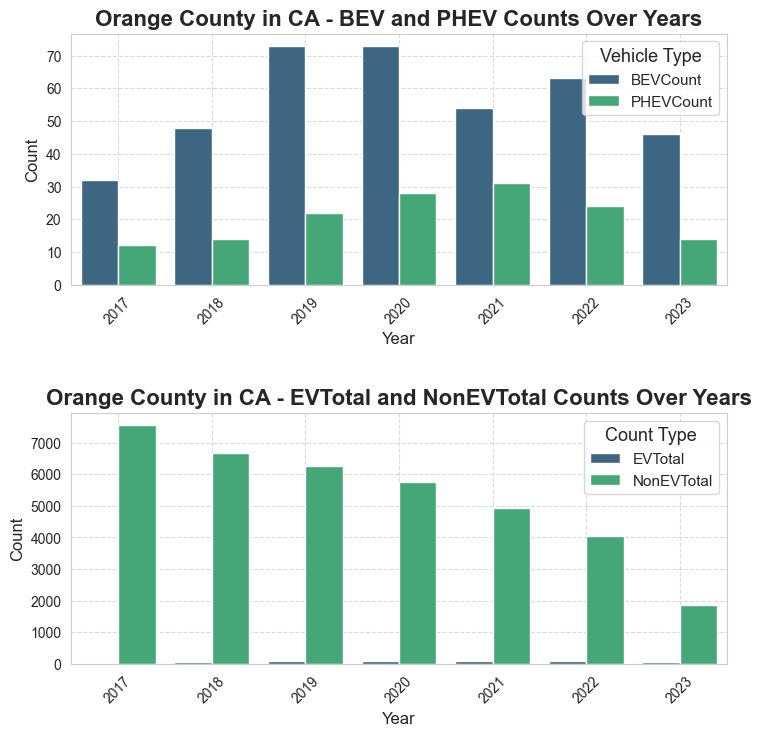

In [11]:
analyze_ev_counts(df2_filtered, 'CA', top_counties_CA)

### Analysis

## write my analysis here

In [12]:
# wa
df1_top_counties_WA = df1_filtered[(df1_filtered['State'] == 'WA') & (df1_filtered['County'].isin(top_counties_WA))]

# ca
df1_top_counties_CA = df1_filtered[(df1_filtered['State'] == 'CA') & (df1_filtered['County'].isin(top_counties_CA))]



In [13]:
df1_top_counties_WA["County"].value_counts()

King         75383
Douglas        285
Klickitat      234
Lincoln         37
Columbia        16
Name: County, dtype: int64

In [14]:
df1_top_counties_CA["County"].value_counts()

Los Angeles    8
Orange         8
Riverside      6
Ventura        2
Name: County, dtype: int64

In [15]:

def get_top_ev_for_each_county(top_counties_df, state_name, top_counties):


    # Group by County and EV attributes and count the occurrences
    grouped_df = top_counties_df.groupby(['County', 'Make', 'Model', 'ModelYear', 'EVType', 'ElectricRange']).size().reset_index(name='Counts')

    # Initialize a DataFrame to hold the top 3 EVs for each county
    top_ev_df = pd.DataFrame()

    # Iterate over each county to get the top 3 EVs
    for county in top_counties:
        county_df = grouped_df[grouped_df['County'] == county].nlargest(3, 'Counts')
        top_ev_df = pd.concat([top_ev_df, county_df])

    return top_ev_df

In [16]:
# Get the top 3 EVs for each county in both states
top_ev_WA = get_top_ev_for_each_county(df1_top_counties_WA, 'WA', top_counties_WA)
top_ev_CA = get_top_ev_for_each_county(df1_top_counties_CA, 'CA', top_counties_CA)


print("Top 3 EVs for each county in WA:")
top_ev_WA


Top 3 EVs for each county in WA:


,County,Make,Model,ModelYear,EVType,ElectricRange,Counts
1,Columbia,FORD,F-150,2022,BEV,0,5
0,Columbia,CHEVROLET,BOLT EV,2017,BEV,238,2
9,Columbia,TESLA,MODEL Y,2023,BEV,0,2
108,Douglas,TESLA,MODEL Y,2023,BEV,0,17
85,Douglas,TESLA,MODEL 3,2019,BEV,220,14
89,Douglas,TESLA,MODEL 3,2022,BEV,0,13
674,Klickitat,TESLA,MODEL Y,2023,BEV,0,18
672,Klickitat,TESLA,MODEL Y,2021,BEV,0,12
684,Klickitat,TOYOTA,RAV4 PRIME,2021,PHEV,42,8
517,King,TESLA,MODEL Y,2023,BEV,0,5604


In [17]:
print("Top 3 EVs for each county in CA:")
top_ev_CA

Top 3 EVs for each county in CA:


,County,Make,Model,ModelYear,EVType,ElectricRange,Counts
15,Riverside,TESLA,MODEL 3,2022,BEV,0,2
14,Riverside,TESLA,MODEL 3,2018,BEV,215,1
16,Riverside,TESLA,MODEL S,2013,BEV,208,1
0,Los Angeles,CHEVROLET,VOLT,2013,PHEV,38,1
1,Los Angeles,FORD,FUSION,2016,PHEV,19,1
2,Los Angeles,LAND ROVER,RANGE ROVER,2020,PHEV,19,1
19,Ventura,CHRYSLER,PACIFICA,2021,PHEV,32,1
20,Ventura,TESLA,MODEL 3,2021,BEV,0,1
8,Orange,AUDI,E-TRON,2023,BEV,0,2
10,Orange,TESLA,MODEL 3,2018,BEV,215,2


### Write your analysis here

### Focus on Only King County

In [18]:
df_all = pd.read_csv("asserts/Electric_Vehicle_Population_Data.csv")


In [19]:

columns_to_keep = ['County', 'City', 'State', 'Model Year', 'Make', 'Model', 
                   'Electric Vehicle Type', 'Electric Range', 
                   'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 
                   'Legislative District', 'Electric Utility']

# Re-filter df_all to keep only rows corresponding to King county and selected columns
df_king = df_all[df_all['County'] == 'King'][columns_to_keep]


In [20]:

grouped_df = df_king.groupby(['City', 'Make', 'Model', 'Model Year', 'Electric Vehicle Type', 
                              'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 
                              'Legislative District', 'Electric Utility']).size().reset_index(name='Count')

# get the top 15
top_15_ev = grouped_df.sort_values(by='Count', ascending=False).head(15)




In [21]:
top_15_ev['Make_Model'] = top_15_ev['Make'] + ' ' + top_15_ev['Model'] + ' ' + top_15_ev['Model Year'].astype(str)


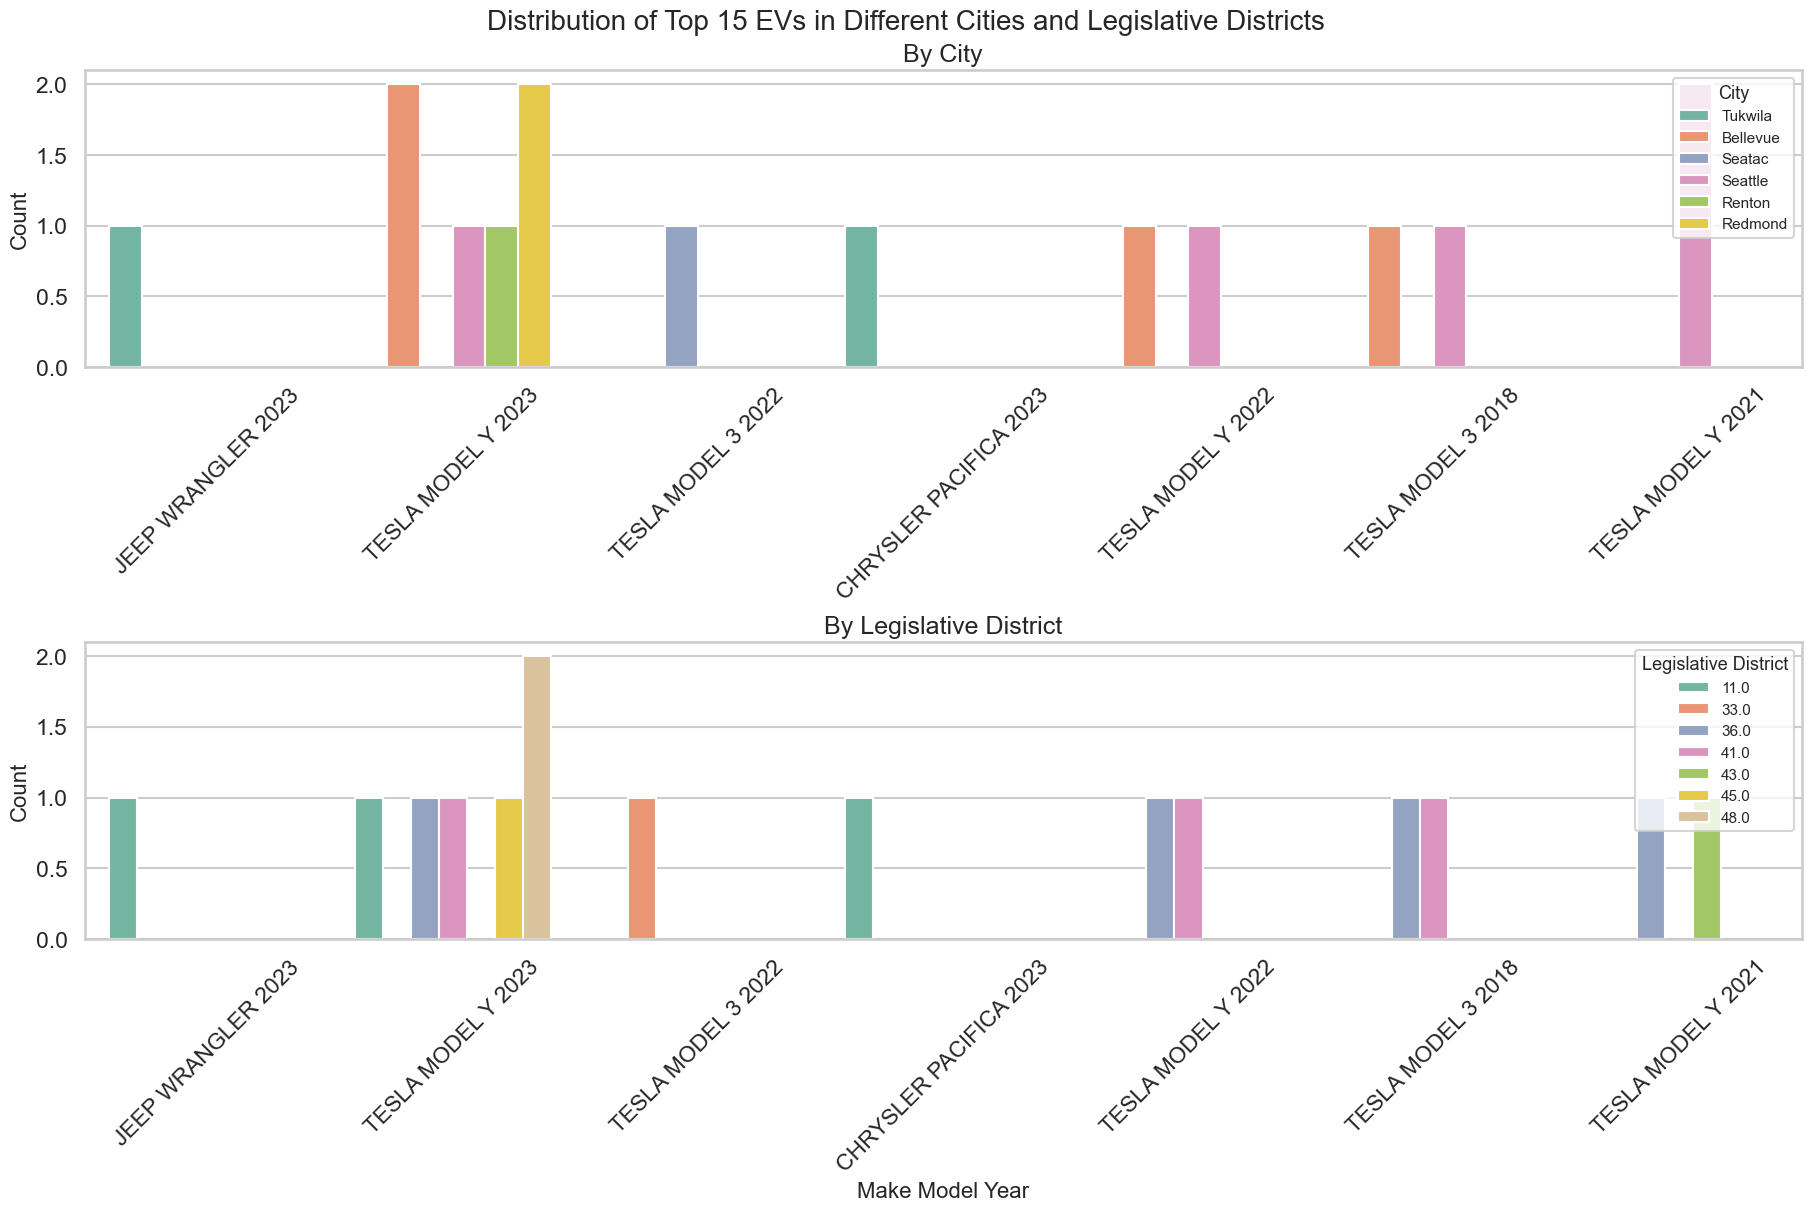

In [22]:


# Set style
sns.set_style("whitegrid")
sns.set_context("talk")

# Set color
palette = "Set2"

# size and style
plt.rcParams.update({'font.size': 12, 'font.family': 'sans-serif'})

top_15_ev['Make_Model'] = top_15_ev['Make'] + ' ' + top_15_ev['Model'] + ' ' + top_15_ev['Model Year'].astype(str)

fig, axes = plt.subplots(2, 1, figsize=(18, 12), constrained_layout=True)
fig.suptitle('Distribution of Top 15 EVs in Different Cities and Legislative Districts', fontsize=20)

#  City
ax1 = sns.countplot(ax=axes[0], data=top_15_ev, x='Make_Model', hue='City', palette=palette)
axes[0].set_title('By City', fontsize=18)
axes[0].set_xlabel('')
axes[0].set_ylabel('Count', fontsize=16)
axes[0].tick_params(axis='x', rotation=45)
axes[0].legend(loc='upper right', title='City', title_fontsize='13', fontsize='11')



# Legislative district
ax2 = sns.countplot(ax=axes[1], data=top_15_ev, x='Make_Model',
                    hue='Legislative District', palette=palette)
axes[1].set_title('By Legislative District', fontsize=18)
axes[1].set_xlabel('Make Model Year', fontsize=16)
axes[1].set_ylabel('Count', fontsize=16)
axes[1].tick_params(axis='x', rotation=45)
axes[1].legend(loc='upper right', title='Legislative District', title_fontsize='13', fontsize='11')



plt.show()
